# WeatherPy

---

## Starter Code to Generate Random Geographic Coordinates and a List of Cities

In [35]:
# Dependencies and Setup
import matplotlib.pyplot as plt
import pandas as pd
import numpy as np
import requests
import time
from scipy.stats import linregress

# Impor the OpenWeatherMap API key
from api_keys import weather_api_key

# Import citipy to determine the cities based on latitude and longitude
from citipy import citipy

### Generate the Cities List by Using the `citipy` Library

In [36]:
# Empty list for holding the latitude and longitude combinations
lat_lngs = []

# Empty list for holding the cities names
cities = []

# Range of latitudes and longitudes
lat_range = (-90, 90)
lng_range = (-180, 180)

# Create a set of random lat and lng combinations
lats = np.random.uniform(lat_range[0], lat_range[1], size=1500)
lngs = np.random.uniform(lng_range[0], lng_range[1], size=1500)
lat_lngs = zip(lats, lngs)

# Identify nearest city for each lat, lng combination
for lat_lng in lat_lngs:
    city = citipy.nearest_city(lat_lng[0], lat_lng[1]).city_name
    
    # If the city is unique, then add it to a our cities list
    if city not in cities:
        cities.append(city)

# Print the city count to confirm sufficient count
print(f"Number of cities in the list: {len(cities)}")

Number of cities in the list: 602


---

## Requirement 1: Create Plots to Showcase the Relationship Between Weather Variables and Latitude

### Use the OpenWeatherMap API to retrieve weather data from the cities list generated in the started code

In [37]:
# Set the API base URL
url = "http://api.openweathermap.org/data/2.5/weather?"
api_key = weather_api_key
units = "metric"

# Define an empty list to fetch the weather data for each city
city_data = []

# Print to logger
print("Beginning Data Retrieval     ")
print("-----------------------------")

# Create counters
record_count = 1
set_count = 1

# Loop through all the cities in our list to fetch weather data
for i, city in enumerate(cities):
        
    # Group cities in sets of 50 for logging purposes
    if (i % 50 == 0 and i >= 50):
        set_count += 1
        record_count = 0

    # Create endpoint URL with each city
    city_url = f"{url}appid={api_key}&q={city}&units={units}"
    
    # Log the url, record, and set numbers
    print("Processing Record %s of Set %s | %s" % (record_count, set_count, city))

    # Add 1 to the record count
    record_count += 1

    # Run an API request for each of the cities
    try:
        # Parse the JSON and retrieve data
        city_weather = requests.get(city_url).json()

        # Parse out latitude, longitude, max temp, humidity, cloudiness, wind speed, country, and date
        city_lat = city_weather["coord"]["lat"]
        city_lng = city_weather["coord"]["lon"]
        city_max_temp = city_weather["main"]["temp_max"]
        city_humidity = city_weather["main"]["humidity"]
        city_clouds = city_weather["clouds"]["all"]
        city_wind = city_weather["clouds"]["all"]
        city_country = city_weather["clouds"]["all"]
        city_date = city_weather["clouds"]["all"]

        # Append the City information into city_data list
        city_data.append({"City": city, 
                          "Lat": city_lat, 
                          "Lng": city_lng, 
                          "Max Temp": city_max_temp,
                          "Humidity": city_humidity,
                          "Cloudiness": city_clouds,
                          "Wind Speed": city_wind,
                          "Country": city_country,
                          "Date": city_date})

    # If an error is experienced, skip the city
    except:
        print("City not found. Skipping...")
        pass
              
# Indicate that Data Loading is complete 
print("-----------------------------")
print("Data Retrieval Complete      ")
print("-----------------------------")

Beginning Data Retrieval     
-----------------------------
Processing Record 1 of Set 1 | grytviken
Processing Record 2 of Set 1 | adamstown
Processing Record 3 of Set 1 | waitangi
Processing Record 4 of Set 1 | iqaluit
Processing Record 5 of Set 1 | al jawf
Processing Record 6 of Set 1 | puerto natales
Processing Record 7 of Set 1 | troitskoye
Processing Record 8 of Set 1 | yellowknife
Processing Record 9 of Set 1 | stanley
Processing Record 10 of Set 1 | tyuratam
Processing Record 11 of Set 1 | port saint john's
Processing Record 12 of Set 1 | albany
Processing Record 13 of Set 1 | mananjary
Processing Record 14 of Set 1 | broome
Processing Record 15 of Set 1 | cadale
Processing Record 16 of Set 1 | isafjordur
Processing Record 17 of Set 1 | jamestown
Processing Record 18 of Set 1 | arkhangel'sk
Processing Record 19 of Set 1 | ushuaia
Processing Record 20 of Set 1 | port-aux-francais
Processing Record 21 of Set 1 | tiksi
Processing Record 22 of Set 1 | edinburgh of the seven seas
Pr

In [52]:
# Convert the cities weather data into a Pandas DataFrame
city_data_df = pd.DataFrame(city_data)

# Show Record Count
city_data_df.count()

City          575
Lat           575
Lng           575
Max Temp      575
Humidity      575
Cloudiness    575
Wind Speed    575
Country       575
Date          575
dtype: int64

In [53]:
# Display sample data
city_data_df.head()

,City,Lat,Lng,Max Temp,Humidity,Cloudiness,Wind Speed,Country,Date
0,grytviken,-54.2811,-36.5092,-2.74,88,24,24,24,24
1,adamstown,-25.0660,-130.1015,22.31,85,92,92,92,92
2,waitangi,-43.9535,-176.5597,9.34,85,100,100,100,100
3,iqaluit,63.7506,-68.5145,4.85,86,20,20,20,20
4,al jawf,29.5000,38.7500,25.49,32,0,0,0,0


In [54]:
# Export the City_Data into a csv
city_data_df.to_csv("output_data/cities.csv", index_label="City_ID")

In [55]:
# Read saved data
city_data_df = pd.read_csv("output_data/cities.csv", index_col="City_ID")

# Display sample data
city_data_df.head()

,City,Lat,Lng,Max Temp,Humidity,Cloudiness,Wind Speed,Country,Date
City_ID,,,,,,,,,
0,grytviken,-54.2811,-36.5092,-2.74,88,24,24,24,24
1,adamstown,-25.0660,-130.1015,22.31,85,92,92,92,92
2,waitangi,-43.9535,-176.5597,9.34,85,100,100,100,100
3,iqaluit,63.7506,-68.5145,4.85,86,20,20,20,20
4,al jawf,29.5000,38.7500,25.49,32,0,0,0,0


### Create the Scatter Plots Requested

#### Latitude Vs. Temperature

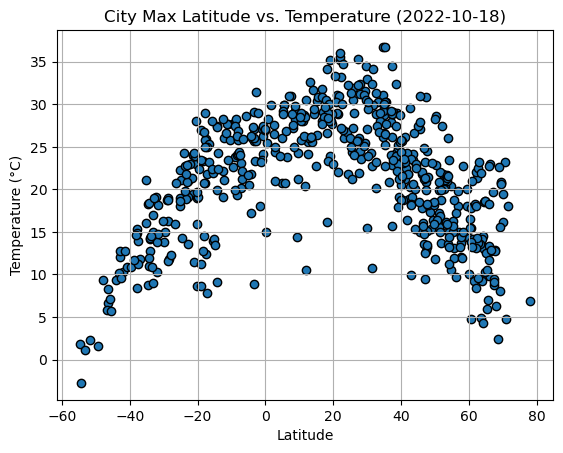

In [56]:
# Build scatter plot for latitude vs. temperature
lat = city_data_df['Lat']
temp = city_data_df['Max Temp']
plt.scatter(lat,temp, label="Cities", edgecolors='black')
plt.xlabel('Latitude')
plt.ylabel('Temperature (°C)')

# Incorporate the other graph properties
plt.title('City Max Latitude vs. Temperature (2022-10-18)')
plt.grid()

# Save the figure
plt.savefig("output_data/Fig1.png")

# Show plot
plt.show()

#### Latitude Vs. Humidity

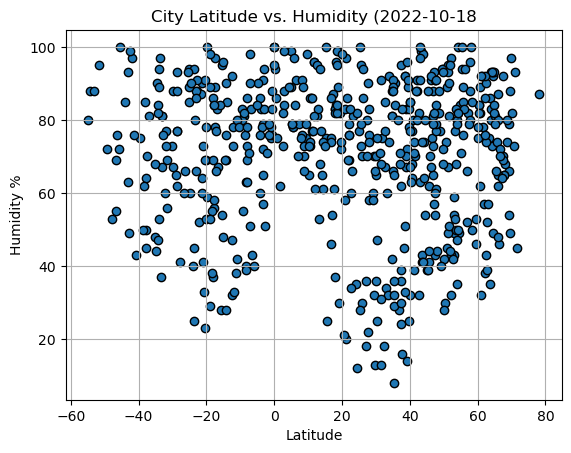

In [57]:
# Build the scatter plots for latitude vs. humidity
lat = city_data_df['Lat']
humidity = city_data_df['Humidity']
plt.scatter(lat,humidity, label="Cities", edgecolors='black')
plt.xlabel('Latitude')
plt.ylabel('Humidity %')

# Incorporate the other graph properties
plt.title('City Latitude vs. Humidity (2022-10-18')
plt.grid()

# Save the figure
plt.savefig("output_data/Fig2.png")

# Show plot
plt.show()

#### Latitude Vs. Cloudiness

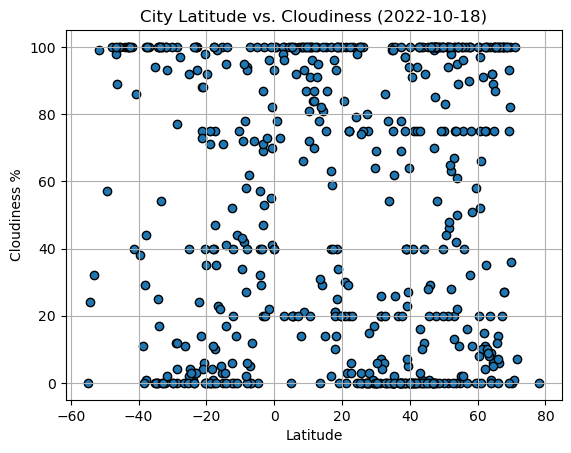

In [58]:
# Build the scatter plots for latitude vs. cloudiness
lat = city_data_df['Lat']
cloudiness = city_data_df['Cloudiness']
plt.scatter(lat,cloudiness, label="Cities", edgecolors='black')
plt.xlabel('Latitude')
plt.ylabel('Cloudiness %')


# Incorporate the other graph properties
plt.title('City Latitude vs. Cloudiness (2022-10-18)')
plt.grid()

# Save the figure
plt.savefig("output_data/Fig3.png")

# Show plot
plt.show()

#### Latitude vs. Wind Speed Plot

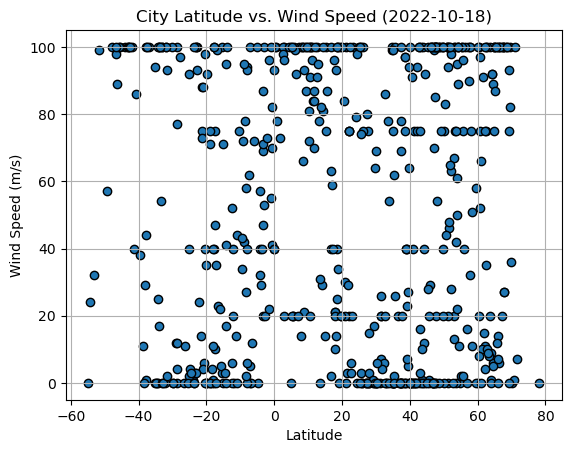

In [59]:
# Build the scatter plots for latitude vs. wind speed
lat = city_data_df['Lat']
wind = city_data_df['Wind Speed']
plt.scatter(lat,wind, label="Cities", edgecolors='black')
plt.xlabel('Latitude')
plt.ylabel('Wind Speed (m/s)')

# Incorporate the other graph properties
plt.title('City Latitude vs. Wind Speed (2022-10-18)')
plt.grid()

# Save the figure
plt.savefig("output_data/Fig4.png")

# Show plot
plt.show()

---

## Requirement 2: Compute Linear Regression for Each Relationship


In [79]:
import numpy as np
import matplotlib.pyplot as plt
from scipy.stats import linregress

# Define a function to create Linear Regression plots
def regress_plot(x, y):
    # Perform a linear regression on input values
    (slope, intercept, rvalue, pvalue, stderr) = linregress(x, y)
    
    # Get regression y-values
    regress_values = x * slope + intercept
    
    # Create line equation string
    line_eq = "y = " + str(round(slope, 2)) + "x +" + str(round(intercept, 2))
    print(line_eq)
    
    # Create Plot
    plt.scatter(x, y, edgecolors='black')
    plt.plot(x, regress_values, "r-")

    # Annotate the line equation
    x_loc = x.min()
    y_loc = y.max()
    plt.annotate(line_eq, (x_loc, y_loc), fontsize=15, color="red")

    # Print r value
    print(f"The r-value is: {rvalue**2}")

    # Show plot
    plt.show()


In [80]:
# Create a DataFrame with the Northern Hemisphere data (Latitude >= 0)
northern_hemi_df = city_data_df[city_data_df['Lat'] >= 0]

# Display sample data
northern_hemi_df.head()

,City,Lat,Lng,Max Temp,Humidity,Cloudiness,Wind Speed,Country,Date
City_ID,,,,,,,,,
3,iqaluit,63.7506,-68.5145,4.85,86,20,20,20,20
4,al jawf,29.5000,38.7500,25.49,32,0,0,0,0
6,troitskoye,52.9821,84.6757,20.96,43,13,13,13,13
7,yellowknife,62.4560,-114.3525,21.29,43,75,75,75,75
8,stanley,54.8680,-1.6985,10.50,84,0,0,0,0


In [81]:
# Create a DataFrame with the Southern Hemisphere data (Latitude < 0)
southern_hemi_df = city_data_df[city_data_df['Lat'] < 0]

# Display sample data
southern_hemi_df.head()

,City,Lat,Lng,Max Temp,Humidity,Cloudiness,Wind Speed,Country,Date
City_ID,,,,,,,,,
0,grytviken,-54.2811,-36.5092,-2.74,88,24,24,24,24
1,adamstown,-25.0660,-130.1015,22.31,85,92,92,92,92
2,waitangi,-43.9535,-176.5597,9.34,85,100,100,100,100
5,puerto natales,-51.7236,-72.4875,2.26,95,99,99,99,99
10,port saint john's,-31.6229,29.5448,18.16,69,93,93,93,93


###  Temperature vs. Latitude Linear Regression Plot

y = -0.25x +32.06
The r-value is: 0.46372129698185927


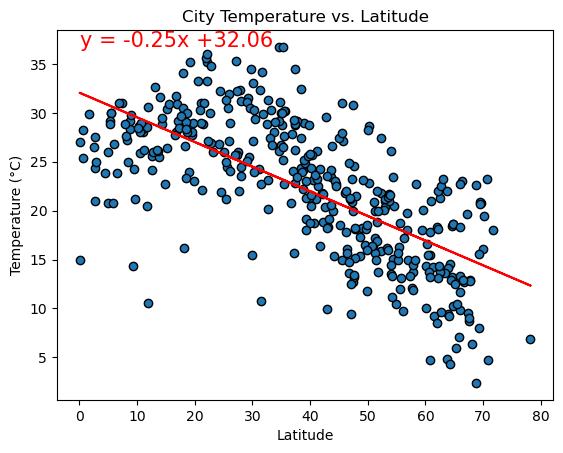

In [82]:
# Linear regression on Northern Hemisphere
# Figure attributes
plt.xlabel('Latitude')
plt.ylabel('Temperature (°C)')
plt.title('City Temperature vs. Latitude')

# Linear regression in Northern Hemisphere
regress_plot(northern_hemi_df['Lat'] , northern_hemi_df['Max Temp'])

y = 0.4x +27.43
The r-value is: 0.6100856786497412


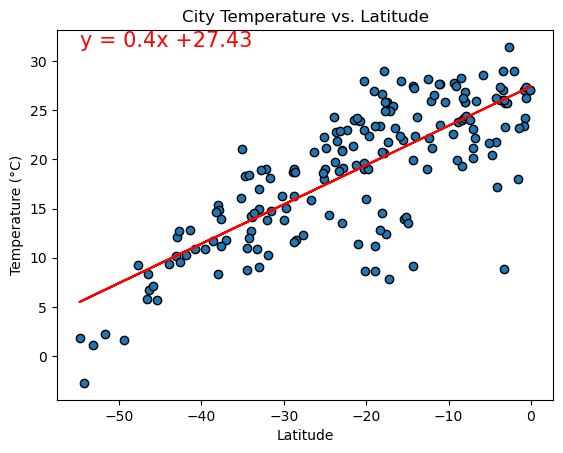

In [83]:
# Figure attributes
plt.xlabel('Latitude')
plt.ylabel('Temperature (°C)')
plt.title('City Temperature vs. Latitude')
# Linear regression on Southern Hemisphere
regress_plot(southern_hemi_df['Lat'] , southern_hemi_df['Max Temp'])

**Discussion about the linear relationship:** YOUR RESPONSE HERE

### Humidity vs. Latitude Linear Regression Plot

y = -0.06x +72.72
The r-value is: 0.0032523296885251787


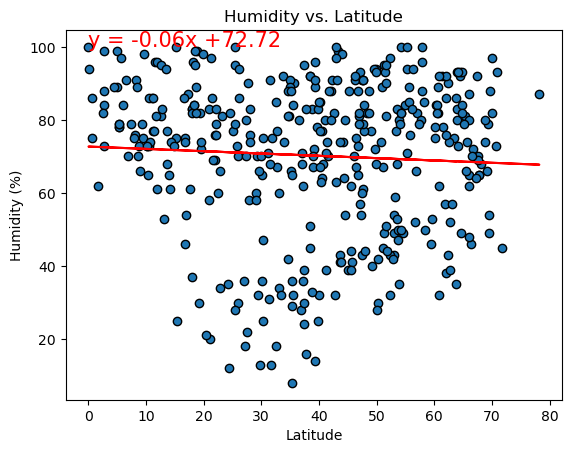

In [84]:
# Figure attributes
plt.xlabel('Latitude')
plt.ylabel('Humidity (%)')
plt.title('Humidity vs. Latitude')

# Northern Hemisphere
regress_plot(northern_hemi_df['Lat'] , northern_hemi_df['Humidity'])

y = -0.01x +70.7
The r-value is: 7.706505696402794e-05


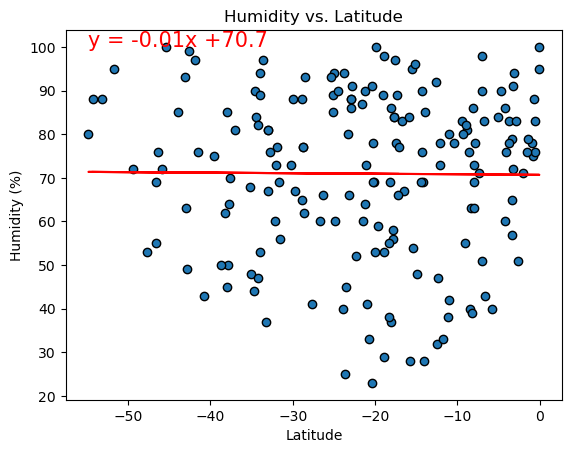

In [85]:
# Figure attributes
plt.xlabel('Latitude')
plt.ylabel('Humidity (%)')
plt.title('Humidity vs. Latitude')
# Southern Hemisphere
regress_plot(southern_hemi_df['Lat'] , southern_hemi_df['Humidity'])

**Discussion about the linear relationship:** YOUR RESPONSE HERE

### Cloudiness vs. Latitude Linear Regression Plot

y = -0.12x +55.18
The r-value is: 0.0028316772810289903


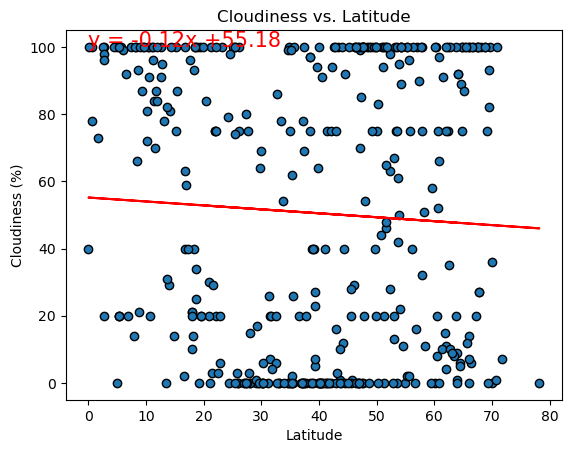

In [86]:
# Figure attributes
plt.xlabel('Latitude')
plt.ylabel('Cloudiness (%)')
plt.title('Cloudiness vs. Latitude')

# Northern Hemisphere
regress_plot(northern_hemi_df['Lat'] , northern_hemi_df['Cloudiness'])

y = -0.38x +39.02
The r-value is: 0.016491813201495835


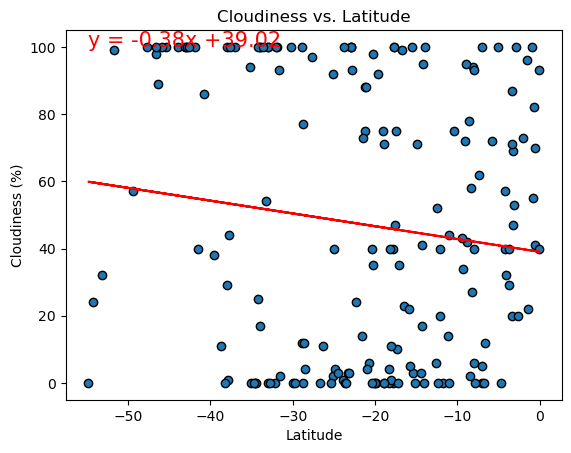

In [87]:
# Figure attributes
plt.xlabel('Latitude')
plt.ylabel('Cloudiness (%)')
plt.title('Cloudiness vs. Latitude')

# Southern Hemisphere
regress_plot(southern_hemi_df['Lat'] , southern_hemi_df['Cloudiness'])

**Discussion about the linear relationship:** YOUR RESPONSE HERE

### Wind Speed vs. Latitude Linear Regression Plot

y = -0.12x +55.18
The r-value is: 0.0028316772810289903


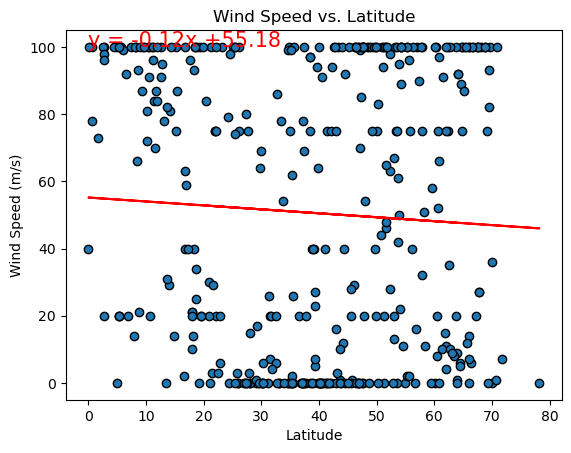

In [88]:
# Figure attributes
plt.xlabel('Latitude')
plt.ylabel('Wind Speed (m/s)')
plt.title('Wind Speed vs. Latitude')

# Northern Hemisphere
regress_plot(northern_hemi_df['Lat'] , northern_hemi_df['Wind Speed'])

y = -0.38x +39.02
The r-value is: 0.016491813201495835


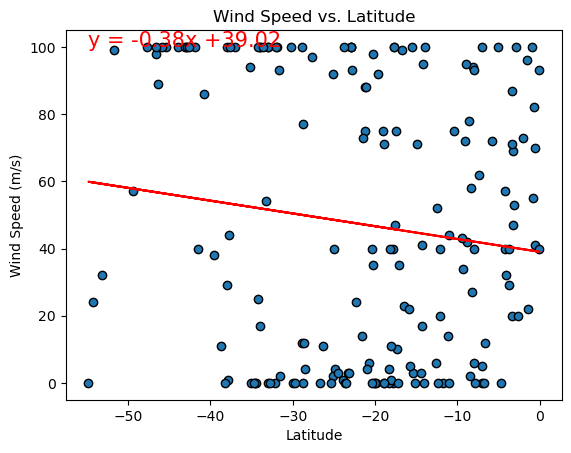

In [89]:
# Figure attributes
plt.xlabel('Latitude')
plt.ylabel('Wind Speed (m/s)')
plt.title('Wind Speed vs. Latitude')

# Southern Hemisphere
regress_plot(southern_hemi_df['Lat'] , southern_hemi_df['Wind Speed'])

**Discussion about the linear relationship:** YOUR RESPONSE HERE